# MEEP Polvlnný dipól

Polvlnný dipól je elemetárnym typom rezonančnej antény. Pre simulácia elektromagnetického poľa vyžarovaného dipólom zvolíme 2D simulačné prostredie o rozmere 200 x 200 uzlov. Dĺžku vlny $\lambda$ zvolíme 100 uzlov, polvlnný dipól bude mať potom dĺžku 50 uzlov a bude orientovaný v smere osi Y. Kongigurácia dipólu a poloha zdroja sú zobrazené na obrázku.

<img src="./img/dipol.png" width=200px alt="Polvlnný dipól, rozmery a materiály" scale="0.4"/>

Pre budenie použijeme zdroj so zložkou $E_Y$ elektromagnetického poľa, frekvencia harmonického signálu budiaceho dipól bude v normovanom prostredí ($c=1$) 

\begin{equation*}
f = \frac{c}{\lambda} = \frac{1} {100} = 0.01
\end{equation*}

Perióda harmonického signálu bude v normovaných časových jednotkách

\begin{equation*}
T = \frac{1}{f} = 100
\end{equation*}

Materiálom dipólu je kov s $\epsilon_r = -\infty$, zdroj je umiestnený v strede v medzere medzi ramenami dipólu vo vodivom prostredí s $\sigma_D = 0.05$

In [1]:
%reset -f 
%matplotlib inline
import meep as mp 
import numpy as np
import matplotlib.pyplot as plt

f = 0.01                              # frekvencia zdroja
area = mp.Vector3(200,200,0)          # simulacne prostredie

dip = [mp.Block(mp.Vector3(1, 24),    # geometria dipolu
        center=mp.Vector3(0,12),
        material=mp.metal),

        mp.Block(mp.Vector3(1, 24),
        center=mp.Vector3(0,-12),
        material=mp.metal),

        mp.Block(mp.Vector3(1, 2),
        center=mp.Vector3(0, 0),
        material=mp.Medium( D_conductivity=0.05))
        ]

src = [mp.Source(mp.ContinuousSource(frequency=f),
        component=mp.Ey,
        center=mp.Vector3(0, 0,0)),    # zdroj
        ]

sim = mp.Simulation(cell_size=area, boundary_layers=[mp.PML(2.0)],
                    geometry=dip, sources=src, resolution=2)

sim.run(until=200)                     # simulacia cez 2*T

Using MPI version 3.1, 1 processes
-----------
Initializing structure...
run 0 finished at t = 200.0 (800 timesteps)


Pre zobrazenie zložky elektrického a magnetického poľa a vyžiareného výkonu použijeme metódu *imshow()* z knižnice matplotlib.

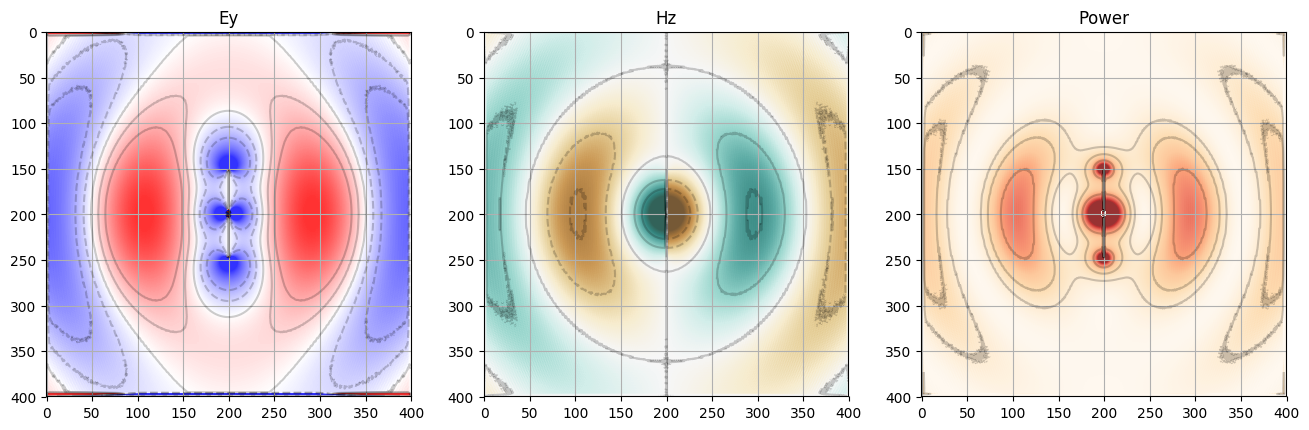

In [2]:
eps = sim.get_array(center=mp.Vector3(), size=area, component=mp.Dielectric)

pw = sim.get_array(center=mp.Vector3(), size=area, component=mp.EnergyDensity)
ey = sim.get_array(center=mp.Vector3(), size=area, component=mp.Ey)
hz = sim.get_array(center=mp.Vector3(), size=area, component=mp.Hz)

fig = plt.figure(dpi=100, figsize=(16,8))
ax = fig.add_subplot(131)
ax.imshow(ey.transpose(), interpolation='spline36', cmap='bwr', alpha=1.0,norm=plt.Normalize(-0.05, 0.05))
ax.contour(ey.transpose(), levels=[-0.02, -0.01, 0.0, 0.01, 0.02], colors="k", alpha=0.2)
ax.imshow(eps.transpose(), interpolation='spline36', cmap='gray', alpha=0.2)
ax.grid()
ax.set_title('Ey')

ax = fig.add_subplot(132)
ax.imshow(hz.transpose(), interpolation='spline36', cmap='BrBG', alpha=1.0, norm=plt.Normalize(-0.07, 0.07))
ax.imshow(eps.transpose(), interpolation='spline36', cmap='gray', alpha=0.2)
ax.contour(hz.transpose(), levels=[-0.05, -0.03, 0.0, 0.03, 0.05], colors="k", alpha=0.2)
ax.set_title('Hz')
ax.grid()

ax = fig.add_subplot(133)
ax.imshow(pw.transpose(), interpolation='spline36', cmap='OrRd', alpha=1.0,norm=plt.Normalize(-0.000, 0.004))
ax.imshow(eps.transpose(), interpolation='spline36', cmap='gray', alpha=0.2)
plt.contour(pw.transpose(), levels=[0.0005, 0.001, 0.002], colors="k", alpha=0.2)
ax.grid()
ax.set_title('Power')
plt.show()